In [57]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [47]:
def funk(df):
    return df['job_country'].str.contains('Croatia').any()

print(funk(df))

True


In [48]:
df_CRO = df[df['job_country'] == 'Croatia'].copy()

df_CRO

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1669,Data Analyst,Junior Data Analyst (m/f),"Zagreb, Croatia",via LinkedIn,Full-time,False,Croatia,2023-01-10 13:47:39,True,False,Croatia,None,NaN,NaN,Nanobit,"['sql', 'r', 'python', 'tableau', 'excel']","{'analyst_tools': ['tableau', 'excel'], 'progr..."
2158,Data Engineer,Data Engineer (m/f),"Zagreb, Croatia",via LinkedIn,Full-time,False,Croatia,2023-03-23 14:02:11,False,False,Croatia,None,NaN,NaN,bonsai.tech,"['sas', 'sas', 'python', 'sql', 'azure', 'data...","{'analyst_tools': ['sas', 'ssis'], 'cloud': ['..."
2164,Software Engineer,Software Engineer Computer Vision & Data Science,"Zagreb, Croatia",via LinkedIn,Full-time,False,Croatia,2023-09-11 13:23:01,False,False,Croatia,None,NaN,NaN,Manpower Croatia,"['azure', 'databricks', 'pytorch', 'keras', 's...","{'cloud': ['azure', 'databricks'], 'libraries'..."
3480,Senior Data Engineer,Senior Data Engineer,Anywhere,via LinkedIn,Full-time,True,Croatia,2023-07-25 13:44:21,False,False,Croatia,None,NaN,NaN,Umanova SA,"['python', 'postgresql', 'aws', 'snowflake']","{'cloud': ['aws', 'snowflake'], 'databases': [..."
3675,Machine Learning Engineer,Machine Learning Engineer,"Zagreb, Croatia",via LinkedIn,Full-time,False,Croatia,2023-10-16 13:49:50,False,False,Croatia,None,NaN,NaN,Happening,"['python', 'dynamodb', 'aws', 'azure', 'gcp', ...","{'cloud': ['aws', 'azure', 'gcp'], 'databases'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762498,Data Scientist,Data Scientist,"Split, Croatia",via LinkedIn,Full-time,False,Croatia,2023-01-02 20:46:56,False,False,Croatia,None,NaN,NaN,DEPT®,"['python', 'sql', 'azure', 'excel']","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
763258,Software Engineer,Senior Software Engineer,Croatia,via Wellfound,Full-time,False,Croatia,2023-07-25 20:44:21,False,False,Croatia,None,NaN,NaN,Eridan,"['c', 'c++', 'windows', 'linux', 'docker']","{'os': ['windows', 'linux'], 'other': ['docker..."
763812,Software Engineer,Prompt Engineer,"Rijeka, Croatia",via Ai-Jobs.net,Full-time,False,Croatia,2023-12-02 20:33:55,True,False,Croatia,year,86400.0,NaN,iOLAP,['tensorflow'],{'libraries': ['tensorflow']}
765548,Data Analyst,Remote Work Opportunity in Croatia | Data Coll...,Anywhere,via LinkedIn,Part-time,True,Croatia,2023-07-28 01:58:23,True,False,Croatia,None,NaN,NaN,Appen,"['go', 'windows']","{'os': ['windows'], 'programming': ['go']}"


In [49]:
df_CRO['job_posted_month'] = df_CRO['job_posted_date'].dt.strftime('%B')



In [50]:
df_CRO_pivot = df_CRO.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size', fill_value=0)

In [51]:
df_CRO_pivot.reset_index(inplace=True)
df_CRO_pivot['month_no'] = pd.to_datetime(df_CRO_pivot['job_posted_month'], format='%B').dt.month
df_CRO_pivot.sort_values('month_no', inplace=True)
df_CRO_pivot.set_index('job_posted_month', inplace=True)
df_CRO_pivot.drop(columns='month_no', inplace=True)


In [52]:
df_CRO_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,9,0,9,14,4,1,0,3,0,4
February,3,1,5,14,1,1,3,4,0,4
March,5,0,6,14,3,6,1,2,1,3
April,6,0,5,6,6,1,1,1,0,6
May,3,1,2,8,5,1,0,0,0,2
June,1,0,4,11,5,1,0,3,0,0
July,1,0,5,12,5,3,0,4,1,6
August,1,1,5,8,3,1,0,2,1,7
September,2,1,4,6,3,2,1,4,0,2


<Axes: xlabel='job_posted_month'>

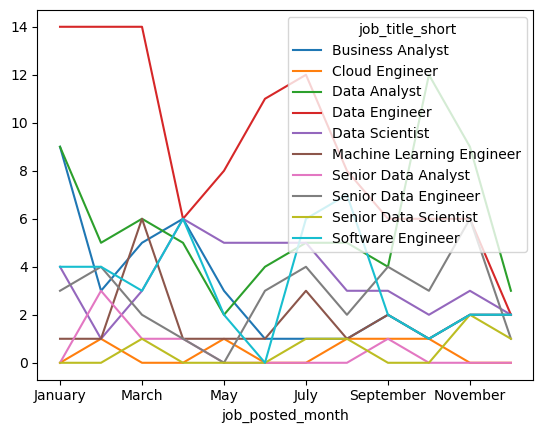

In [53]:
df_CRO_pivot.plot(kind='line')

In [54]:
top_3 = df_CRO['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

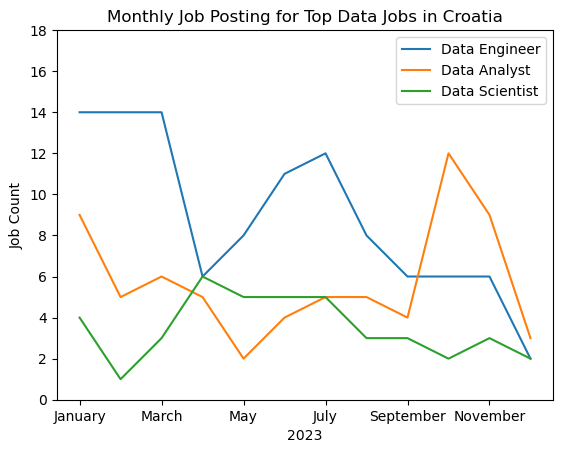

In [59]:
df_CRO_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Posting for Top Data Jobs in Croatia')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.ylim(0, 18)
plt.legend()
plt.show()